In [1]:
import numpy as np
import configparser
import matplotlib.pyplot as plt

In [2]:
config = configparser.ConfigParser()
config.read('../config/config.ini')

['../config/config.ini']

In [3]:
import sys
sys.path.insert(0, '../source/')
from Get_Train_Test_Data import GetTrainTestData
from Aux_Functions import pltResults, confusionMatrix

Using TensorFlow backend.


In [4]:
#GetTrainTestData(config).createDataset()

In [5]:
X_train, X_test,X_val, y_train, y_test, y_val = GetTrainTestData(config).readDataset()

  9%|▉         | 12/131 [00:00<00:01, 112.71it/s]

Obteniendo..../input/n0


 11%|█         | 15/139 [00:00<00:00, 139.26it/s]

Obteniendo..../input/n1


 11%|█         | 15/137 [00:00<00:00, 144.97it/s]

Obteniendo..../input/n2


 11%|█         | 16/152 [00:00<00:00, 156.37it/s]

Obteniendo..../input/n3


 11%|█         | 14/131 [00:00<00:00, 133.11it/s]

Obteniendo..../input/n4


 11%|█         | 15/141 [00:00<00:00, 143.57it/s]

Obteniendo..../input/n5


  8%|▊         | 11/132 [00:00<00:01, 106.83it/s]

Obteniendo..../input/n6


 10%|▉         | 14/142 [00:00<00:00, 137.29it/s]

Obteniendo..../input/n7


 10%|▉         | 13/133 [00:00<00:00, 128.49it/s]

Obteniendo..../input/n8


  8%|▊         | 11/130 [00:00<00:01, 100.81it/s]

Obteniendo..../input/n9


100%|██████████| 130/130 [00:01<00:00, 87.82it/s]


test-size = 0.25 Cambiar valor en config.py
X_train Tamaño: (1026, 150, 150, 3) - X_test Tamaño: (171, 150, 150, 3) - X_val Tamaño: (171, 150, 150, 3)              - y_train Tamaño: (1026,) - y_test Tamaño: (171,) - y_val Tamaño: (171,) 


In [6]:
from keras.utils import np_utils
from keras.callbacks import TensorBoard, EarlyStopping

In [7]:
y_test_for_matrix_confusion = y_test
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_val = np_utils.to_categorical(y_val)

In [8]:
from CNN_Model import CNNModel
from keras.optimizers import SGD

In [9]:
model = CNNModel(config, X_train).build_model()

sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov=True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
__________

In [11]:
# Creamos los callbacks para el modelo
callbacks = [
            TensorBoard(log_dir=config['CALLBACKS']['TENSORBOARD_LOGDIR'] + "3",
                        write_images=config['CALLBACKS']['TENSORBOARD_WRITEIMAGES'],
                        write_graph=config['CALLBACKS']['TENSORBOARD_WRITEGRAPH'],
                        update_freq=config['CALLBACKS']['TENSORBOARD_UPDATEFREQ']
                        ),
            EarlyStopping(monitor=config['CALLBACKS']['EARLYSTOPPING_MONITOR'],
                          mode=config['CALLBACKS']['EARLYSTOPPING_MODE'],
                          patience=int(config['CALLBACKS']['EARLYSTOPPING_PATIENCE']),
                          verbose=1)
]

In [12]:
history = model.fit(
        X_train,
        y_train,
        batch_size = int(config['CNN_CONFIGURATION']['BATCH_SIZE']),
        epochs = int(config['CNN_CONFIGURATION']['EPOCHS']),
        verbose = 1,
        validation_data = (X_val, y_val),
        callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 1026 samples, validate on 171 samples
Epoch 1/70
1026/1026 [==============================] - 198s 193ms/step - loss: 2.2153 - acc: 0.1764 - val_loss: 1.9829 - val_acc: 0.3392
Epoch 2/70
1026/1026 [==============================] - 225s 219ms/step - loss: 1.8456 - acc: 0.3441 - val_loss: 1.6901 - val_acc: 0.4094
Epoch 3/70
1026/1026 [==============================] - 232s 226ms/step - loss: 1.5214 - acc: 0.4883 - val_loss: 1.4154 - val_acc: 0.4386
Epoch 4/70
1026/1026 [==============================] - 209s 204ms/step - loss: 1.2838 - acc: 0.5507 - val_loss: 1.3605 - val_acc: 0.5146
Epoch 5/70
1026/1026 [==============================] - 198s 193ms/step - loss: 1.0578 - acc: 0.6413 - val_loss: 1.3594 - val_acc: 0.4795
Epoch 6/70
1026/1026 [==============================] - 179s 174ms/step - loss: 0.8803 - acc: 0.7008 - val_loss: 1.2809 - val_acc: 0.5322
Epoch 7/70
1026/1026 [==============================] - 194s 189ms/step - los

In [13]:
# Grafica Accuracy
pltResults(
    '../logs/',
    history.history['acc'],
    history.history['val_acc'],
    'Model accuracy',
    'epoch',
    'accuracy')

In [14]:
# Grafica Loss
pltResults(
    '../logs/',
    history.history['loss'],
    history.history['val_loss'],
    'Model loss',
    'epoch',
    'loss')

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.2949193618450945
Test accuracy: 0.637426899887665


In [16]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print("Predecido: ", y_pred)

Predecido:  [0 4 3 2 6 9 1 1 1 2 3 9 5 8 3 1 1 8 4 2 2 9 6 0 2 1 1 1 5 0 3 1 1 0 0 5 1
 4 4 5 8 3 8 1 7 3 1 1 2 6 1 0 0 7 2 1 2 4 3 5 4 1 1 9 4 0 0 9 8 4 4 4 6 7
 6 0 3 6 7 3 7 7 1 6 3 1 6 5 7 8 1 7 1 7 4 0 5 1 5 0 4 7 9 8 8 5 9 7 4 4 7
 1 7 1 0 2 2 7 7 4 2 8 7 6 9 1 2 6 3 3 3 6 6 2 1 8 1 1 4 1 7 9 8 9 6 5 1 4
 1 1 5 4 5 2 1 7 0 5 2 3 3 5 3 1 2 6 1 3 2 9 8]


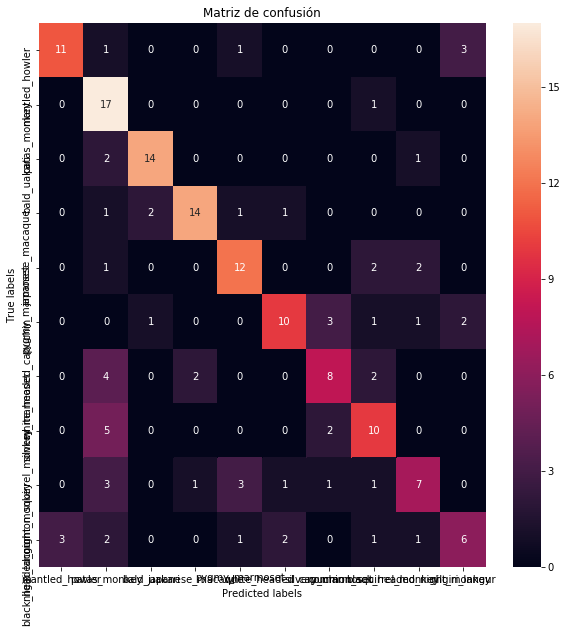

In [18]:
confusionMatrix(y_test_for_matrix_confusion, y_pred)

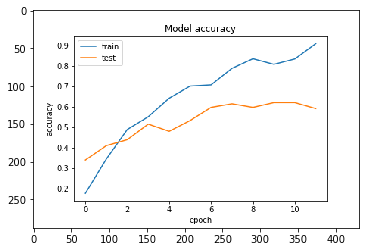

In [26]:
import matplotlib.image as mpimg
img=mpimg.imread('../logs/accuracy.png')
plt.imshow(img) 
plt.show()

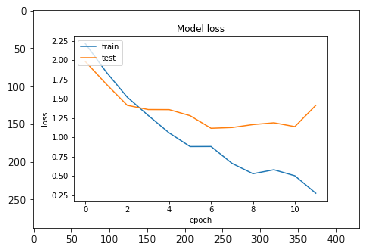

In [27]:
img=mpimg.imread('../logs/loss.png')
plt.imshow(img) 
plt.show()